In [24]:
#import needed libraries
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [25]:
#read the image
image_path = "car.jpg"
k=5
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (600, 400))

In [26]:
# Converting the image 2d array of pixels
pixels = image.reshape((-1, 3))

In [27]:
# Appliquer KMeans pour la segmentation des couleurs
clt = KMeans(n_clusters=k)
clt.fit(pixels)

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [28]:
#calculate the histogram colors 
num_labels = np.arange(0, len(np.unique(clt.labels_)) + 1)
hist, _ = np.histogram(clt.labels_, bins=num_labels)

hist = hist.astype("float")
hist /= hist.sum()

In [29]:
#calculat the dominant color 
bar = np.zeros((50, 300, 3), dtype="uint8")
start_x = 0

for (percent, color) in zip(hist, clt.cluster_centers_):
    end_x = start_x + (percent * 300)
    cv2.rectangle(bar, (int(start_x), 0), (int(end_x), 50),
                  color.astype("uint8").tolist(), -1)
    start_x = end_x

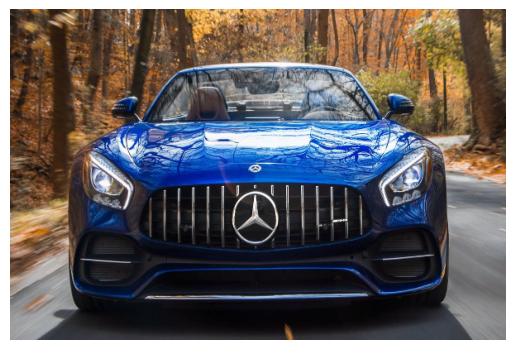

In [30]:
#ploting the image
plt.figure()
plt.axis("off")
plt.imshow(image)

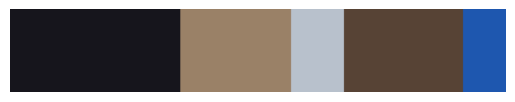

In [31]:
#ploting the bar of dominant color
plt.figure()
plt.axis("OFF")
plt.imshow(bar)
plt.show()